# Analisis Exploratorio de Datos

En este documento se realiza el analisis exploratorio de los datos proporcionados para el proyecto

In [1]:
# Importacion de librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# lectura de datos 
coursera_courses = pd.read_csv('Coursera_courses.csv', low_memory=False, encoding='utf8')
coursera_reviews = pd.read_csv('Coursera_reviews.csv', low_memory=False)
edx_courses = pd.read_csv('edx_courses.csv', low_memory=False, encoding='utf8')
udemy_courses = pd.read_csv('udemy_courses.csv', low_memory=False, encoding='utf8')

In [147]:
coursera_reviews = coursera_reviews.drop_duplicates()

Extraer informacion general de los datasets

In [11]:
coursera_courses.info()
coursera_courses.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [12]:
coursera_courses.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [13]:
coursera_reviews.info()
coursera_reviews.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [14]:
coursera_reviews.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [15]:
edx_courses.info()
edx_courses.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [16]:
edx_courses.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [17]:
udemy_courses.info()
udemy_courses.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [18]:
udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [10]:
# eliminacion de valores nulos en las reseñas
coursera_reviews['reviews'] = coursera_reviews['reviews'].dropna()

In [24]:
'''previamente se importo la libreria nltk'''

# Descargar los recursos necesarios de NLTK
nltk.download('vader_lexicon')

# Crear una instancia del analizador de sentimientos
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
# Aplicar el analisis de sentimientos a cada review y asignar los puntajes a la columna sentiment_score
coursera_reviews['sentiment_score'] = coursera_reviews['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'] if isinstance(x, str) else None)

In [32]:
# redondear el valor a 2 digitos decimales
coursera_reviews['sentiment_score'] = coursera_reviews['sentiment_score'].round(2)

In [33]:
coursera_reviews.head(5)

,reviews,reviewers,date_reviews,rating,course_id,sentiment_score
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,0.64
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,0.44
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,0.66
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,0.46
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,0.78


In [11]:
# asignar un numero de id a los cursos desde el df de coursera_courses

coursera_courses['n_course_id'] = range(1, len(coursera_courses) + 1)

In [13]:
coursera_courses.to_csv('coursera_courses.csv', index=False)

In [29]:
coursera_courses.dropna()

,name,institution,course_url,course_id,n_course_id,institution_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1,1
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,2,2
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,3,3
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4,4
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,5,5
...,...,...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,619,39
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,620,86
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,621,30
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,622,20


In [30]:
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            623 non-null    object
 1   institution     623 non-null    object
 2   course_url      623 non-null    object
 3   course_id       623 non-null    object
 4   n_course_id     623 non-null    int64 
 5   institution_id  623 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 29.3+ KB


In [15]:
# Crear un diccionario de asignación utilizando course_id y n_course_id de coursera_courses
course_id_mapping = coursera_courses.set_index('course_id')['n_course_id'].to_dict()

In [16]:
# Asignar el identificador de curso
coursera_reviews['n_course_id'] = coursera_reviews['course_id'].map(course_id_mapping)

In [50]:
# convertir el analisis de sentimientos en una escala del 0 al 100 para visualizar mejor los datos
coursera_reviews['sentiment_score'] = (coursera_reviews['sentiment_score'] + 1) * 50

In [17]:
institution_dict = {}

for index, institution in enumerate(coursera_courses['institution']):
    if institution not in institution_dict:
        institution_dict[institution] = len(institution_dict) + 1

coursera_courses['institution_id'] = coursera_courses['institution'].map(institution_dict)

In [21]:
coursera_courses.to_csv('coursera_courses.csv', index=False)

In [22]:
coursera_courses

,name,institution,course_url,course_id,n_course_id,institution_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1,1
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,2,2
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,3,3
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4,4
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,5,5
...,...,...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,619,39
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,620,86
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,621,30
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,622,20


In [19]:
coursera_reviews['institution_id'] = coursera_reviews['course_id'].map(coursera_courses.set_index('course_id')['institution_id'])

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=coursera_reviews, x='n_course_id', y='sentiment_score', hue='institution_id', errorbar=None)

# Personalizar el gráfico
plt.title('Sentiment Scores por Curso e Institución')
plt.xlabel('ID del Curso')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.legend(title='ID de la Institución')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='n_course_id', ylabel='sentiment_score'>

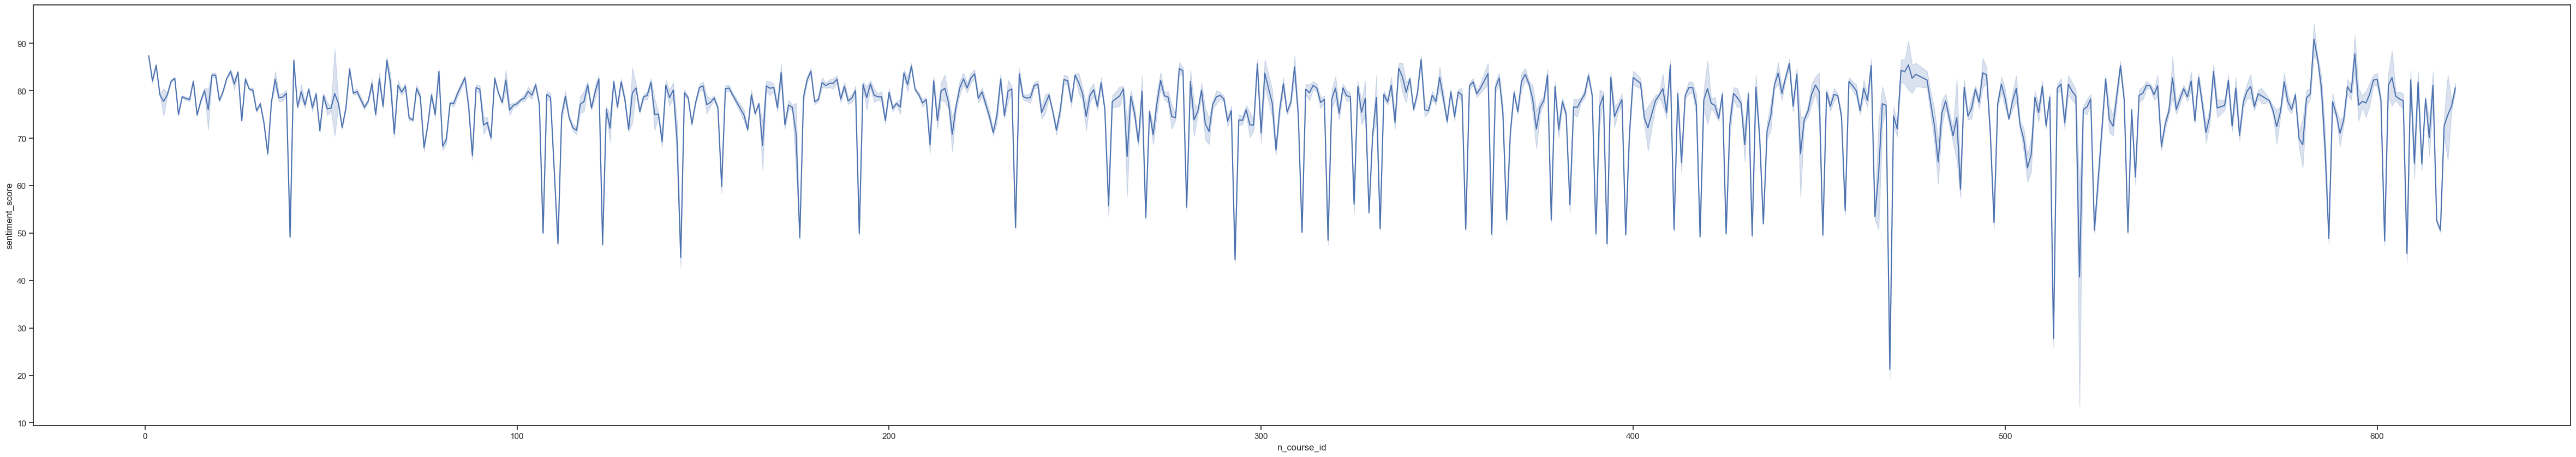

In [99]:
plt.figure(figsize=(60, 10))
sns.lineplot(data=coursera_reviews, x='n_course_id', y='sentiment_score')

In [ ]:
# Crear una nueva columna para el color de las barras según el rango del sentiment_score
coursera_reviews['color'] = pd.cut(coursera_reviews['sentiment_score'], bins=[-np.inf, 50, 75, np.inf], labels=['red', 'blue', 'green'])


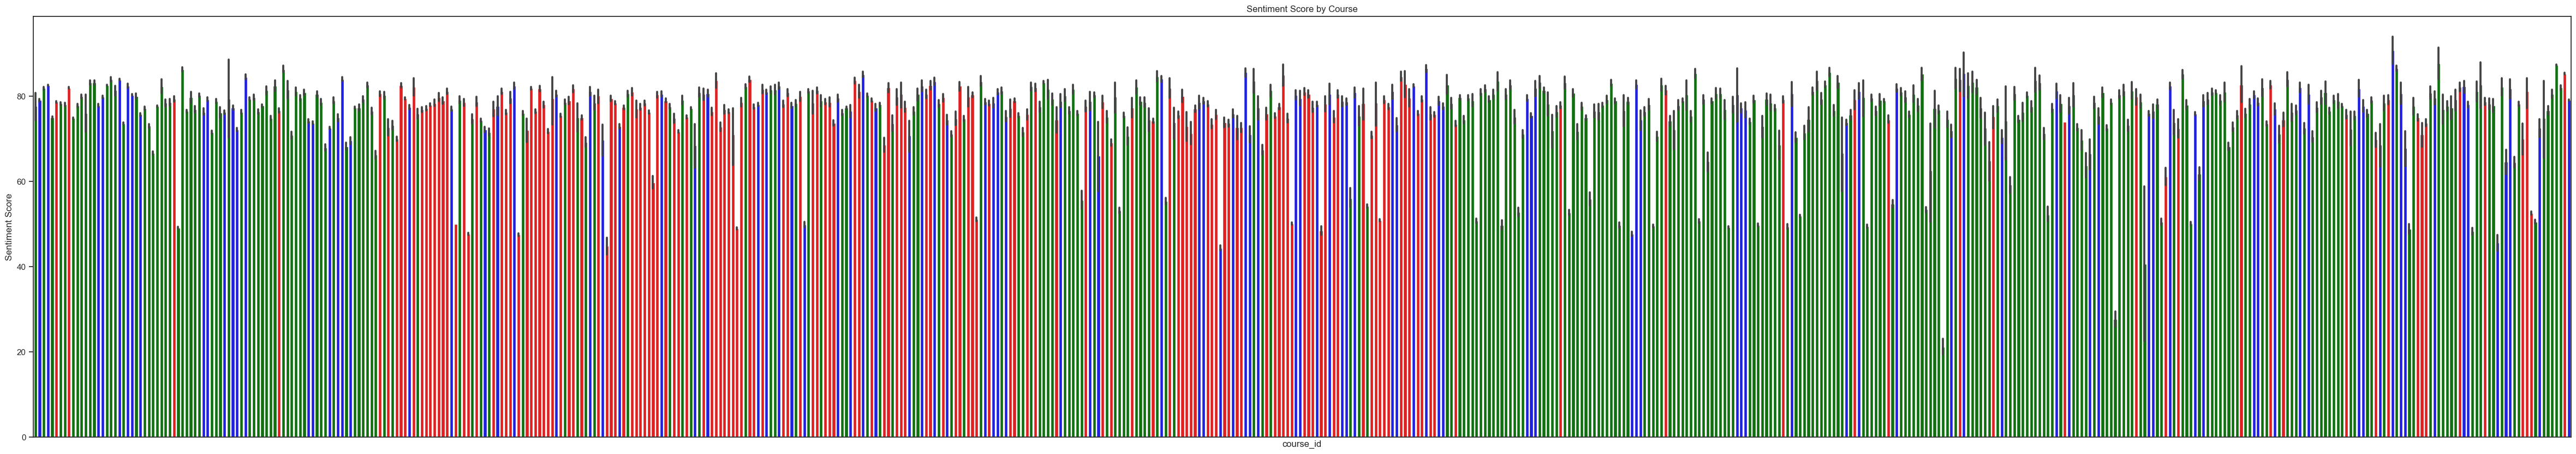

In [117]:
# Configurar el tamaño de la figura
plt.figure(figsize=(60, 10))

# Crear el gráfico de barras con el color de las barras definido por la columna 'color'
sns.barplot(data=coursera_reviews, x='course_id', y='sentiment_score', palette=coursera_reviews['color'])

# Configurar los ejes y los títulos del gráfico
plt.xticks([])  # Eliminar las etiquetas del eje x
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Course')

plt.show()


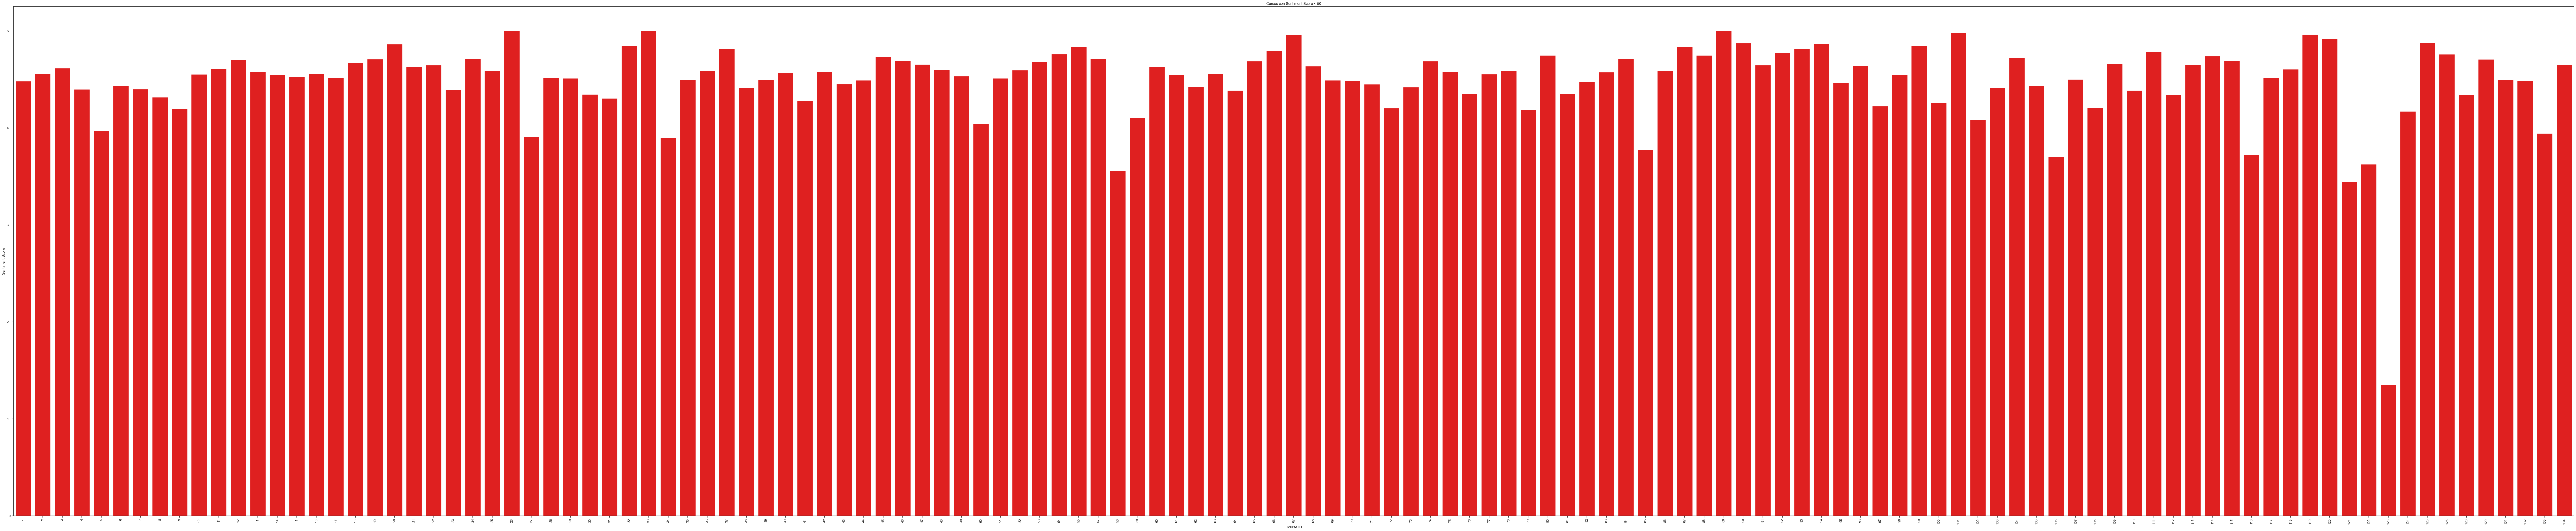

In [123]:
# Filtrar el DataFrame original por categoría roja (sentiment_score < 50)
red_df = coursera_reviews[coursera_reviews['color'] == 'red']

# Ordenar el DataFrame filtrado por el score de sentimientos en orden ascendente
red_df = red_df.sort_values('sentiment_score')

# Gráfico de barras para la categoría roja
plt.figure(figsize=(150, 30))
sns.barplot(data=red_df, x='institution_id', y='sentiment_score', color='red', errorbar=None)
plt.xlabel('Course ID')
plt.ylabel('Sentiment Score')
plt.title('Cursos con Sentiment Score < 50')
plt.xticks(rotation=90)
plt.show()


In [155]:
red_df

,reviews,reviewers,date_reviews,rating,course_id,sentiment_score,n_course_id,institution_id,color
571540,This course does introduce the beginning stude...,By Rameses,"May 26, 2020",1,python-network-data,0.0,82,6,red
571515,This course does introduce the beginning stude...,By Rameses,"May 26, 2020",1,python-network-data,0.0,82,6,red
571490,This course does introduce the beginning stude...,By Rameses,"May 26, 2020",1,python-network-data,0.0,82,6,red
1149180,I am very disappointed with this course. It is...,By Hugo E J R,"Sep 02, 2019",2,intro-data-science-programacion-estadistica-r,0.5,398,46,red
95465,I came to learn about this course because I wa...,By Tawanix,"Sep 28, 2020",1,python-crash-course,0.5,11,4,red
...,...,...,...,...,...,...,...,...,...
666285,"Muy explicativo , me gusto mucho",By MARCO F B G,"Aug 23, 2018",5,contabilidad,50.0,111,46,red
666286,"Excelente curso, muy entendible",By Daniela T,"Jul 08, 2020",5,contabilidad,50.0,111,46,red
666287,"Muy bueno, sencillo de aprender",By Rosario I E,"Jun 29, 2020",5,contabilidad,50.0,111,46,red
666260,"Muy buen curso, fácil de entender.",By Mariela R A,"Sep 26, 2019",5,contabilidad,50.0,111,46,red


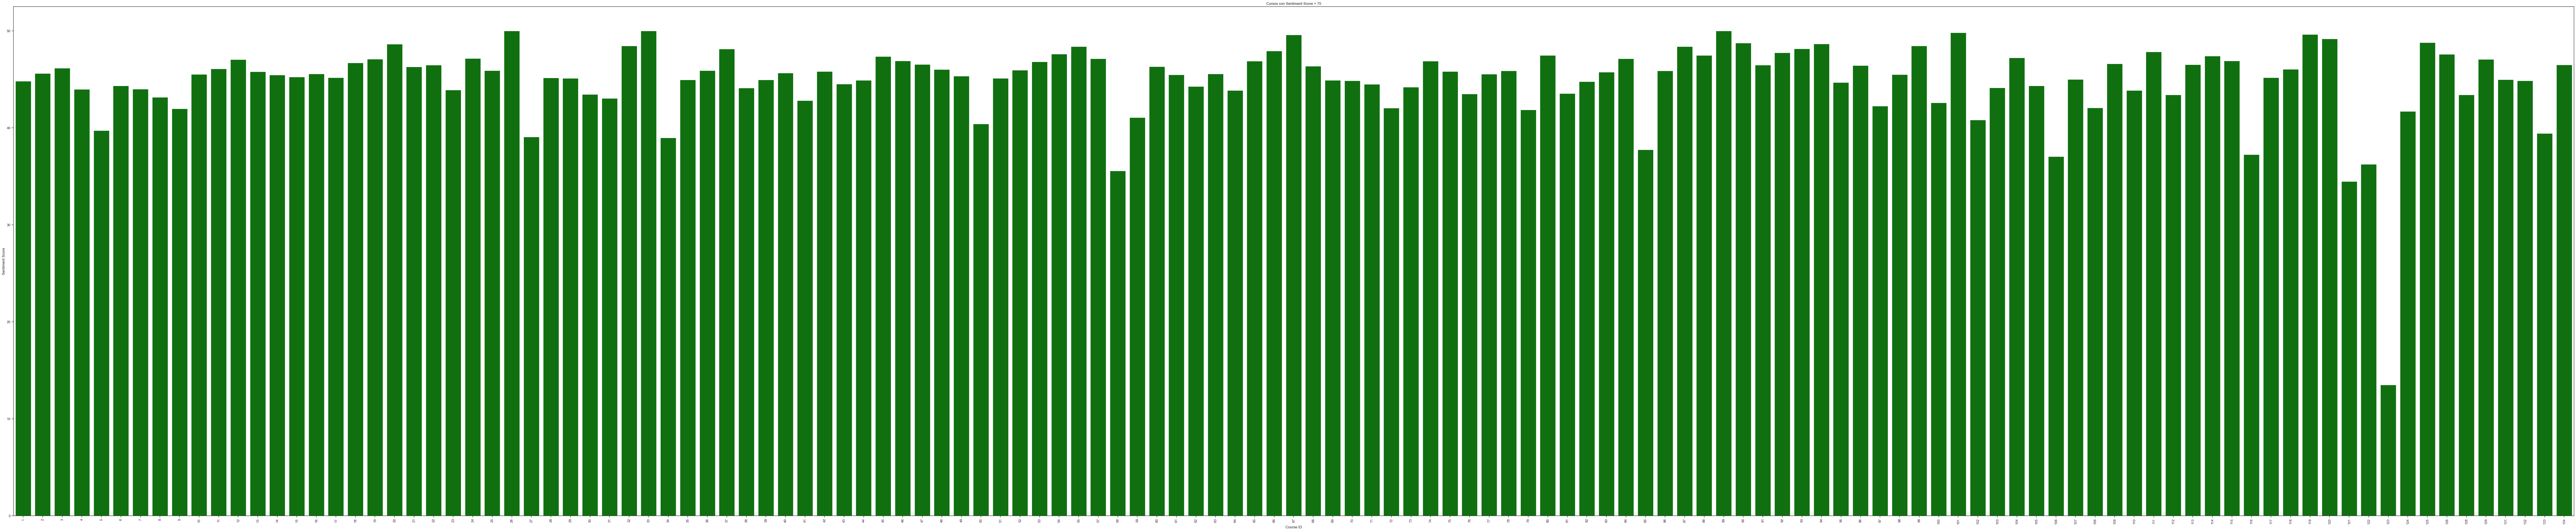

In [127]:
# Filtrar el DataFrame original por categoría verde (sentiment_score > 75)
green_df = coursera_reviews[coursera_reviews['color'] == 'green']

# Ordenar el DataFrame filtrado por el score de sentimientos en orden ascendente
green_df = green_df.sort_values('sentiment_score')

# Gráfico de barras para la categoría roja
plt.figure(figsize=(150, 30))
sns.barplot(data=red_df, x='institution_id', y='sentiment_score', color='green', errorbar=None)
plt.xlabel('Course ID')
plt.ylabel('Sentiment Score')
plt.title('Cursos con Sentiment Score > 75')
plt.xticks(rotation=90)
plt.show()

In [ ]:
green_df['sentiment_score'].max()

In [124]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id,sentiment_score,n_course_id,institution_id,color
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,82.0,5,5,green
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,72.0,5,5,blue
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,83.0,5,5,green
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,73.0,5,5,blue
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,89.0,5,5,green


In [148]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   reviews          519891 non-null  object  
 1   reviewers        519947 non-null  object  
 2   date_reviews     519947 non-null  object  
 3   rating           519947 non-null  int64   
 4   course_id        519947 non-null  object  
 5   sentiment_score  519891 non-null  float64 
 6   n_course_id      519947 non-null  int64   
 7   institution_id   519947 non-null  int64   
 8   color            519891 non-null  category
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 36.2+ MB


In [153]:
max_score = coursera_reviews['sentiment_score'].max()
min_score = coursera_reviews[coursera_reviews['sentiment_score'] != 0]['sentiment_score'].min()
max_row = coursera_reviews[coursera_reviews['sentiment_score'] == max_score]
min_row = coursera_reviews[coursera_reviews['sentiment_score'] == min_score]
max_row = max_row[max_row['rating'] == 5]
min_row = min_row[min_row['rating'] == 1]


In [154]:
min_row

,reviews,reviewers,date_reviews,rating,course_id,sentiment_score,n_course_id,institution_id,color
95415,I came to learn about this course because I wa...,By Tawanix,"Sep 28, 2020",1,python-crash-course,0.5,11,4,red
978954,I would like to give this course worse than a ...,By emmanuel g,"Mar 27, 2017",1,algorithmic-toolbox,0.5,258,15,red
1225414,The blind leading the blind. Vague and con...,By C. L P,"Sep 03, 2020",1,applied-data-science-capstone,0.5,456,9,red
1261239,"If there was negative score, I wouldn't even h...",By Qian L,"Jul 06, 2019",1,ds,0.5,516,9,red


In [143]:
coursera_reviews['rating'].unique()

array([4, 5, 1, 2, 3], dtype=int64)

In [ ]:
# Crear un DataFrame con los valores máximo y mínimo
df = pd.concat([max_row, min_row])

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Graficar los valores utilizando un gráfico de barras horizontales
sns.barplot(data=df, x='sentiment_score', y='course_id', hue='rating')

# Establecer el título y las etiquetas de los ejes
plt.title('Valores Máximo y Mínimo de Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Course ID')

# Mostrar el gráfico
plt.show()

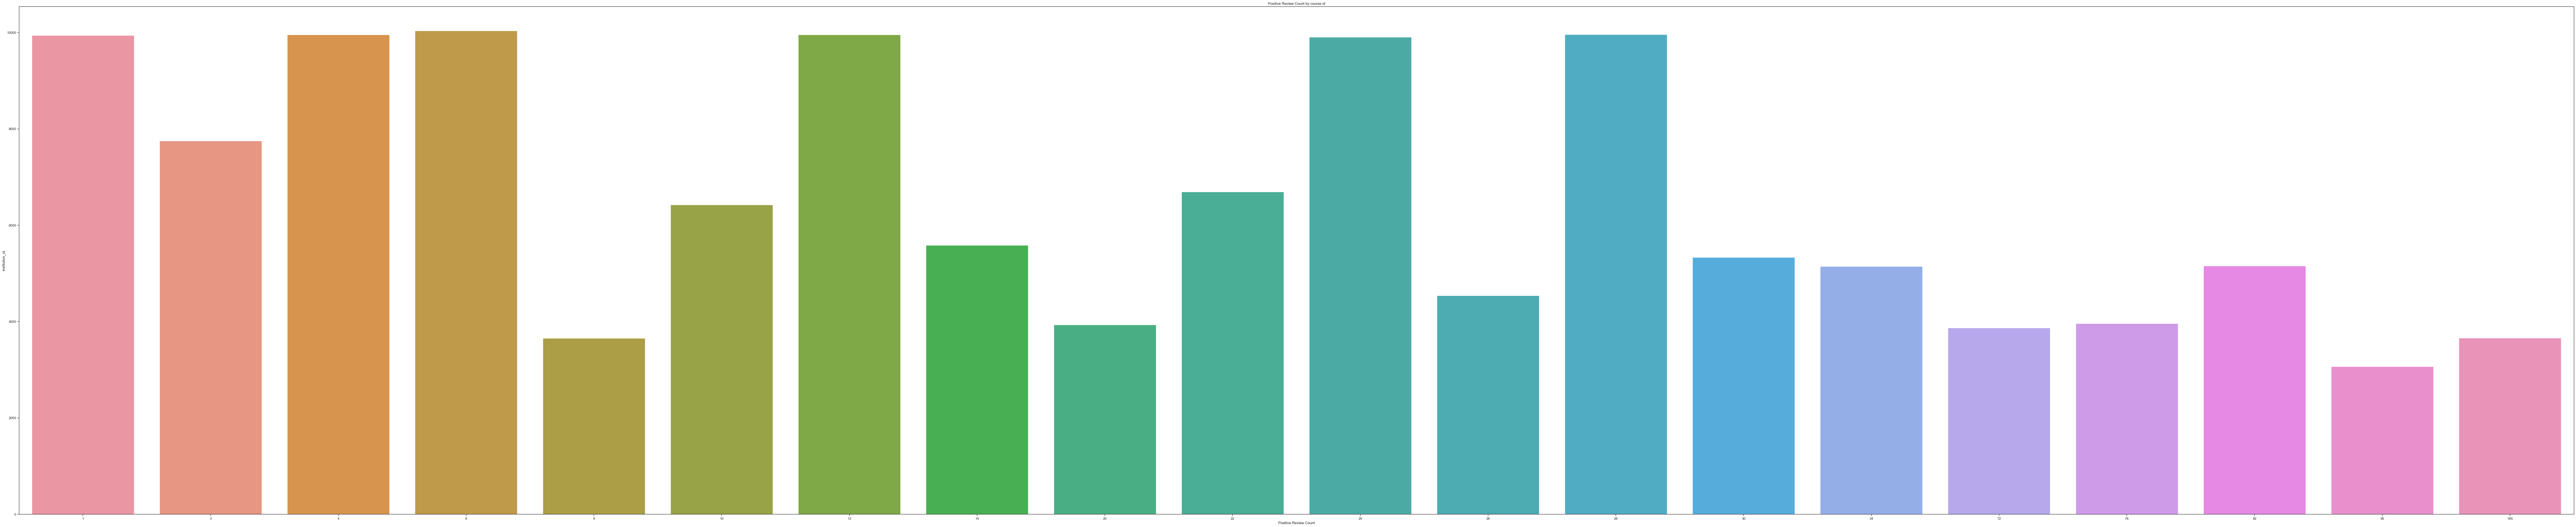

In [181]:
# Filtrar las reseñas con calificación de 5
positive_reviews = coursera_reviews[coursera_reviews['rating'] == 5]

# Contar el número de reseñas positivas por curso
positive_counts = positive_reviews['n_course_id'].value_counts().reset_index()

# Renombrar las columnas
positive_counts.columns = ['n_course_id', 'positive_count']

# Ordenar por el número de reseñas positivas en orden descendente
positive_counts = positive_counts.sort_values('positive_count', ascending=False)

plt.figure(figsize=(150, 30))

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(data=positive_counts.head(20), x='n_course_id', y='positive_count')

# Etiquetas de los ejes
plt.xlabel('Positive Review Count')
plt.ylabel('Course')

# Título del gráfico
plt.title('Positive Review Count by course')

# Mostrar el gráfico
plt.show()

In [183]:
pos_cons_x_course = positive_counts.head(10)
pos_cons_x_course

,n_course_id,positive_count
0,8,10036
1,28,9960
2,4,9957
3,13,9957
4,1,9943
5,25,9907
6,3,7753
7,22,6692
8,10,6423
9,14,5585


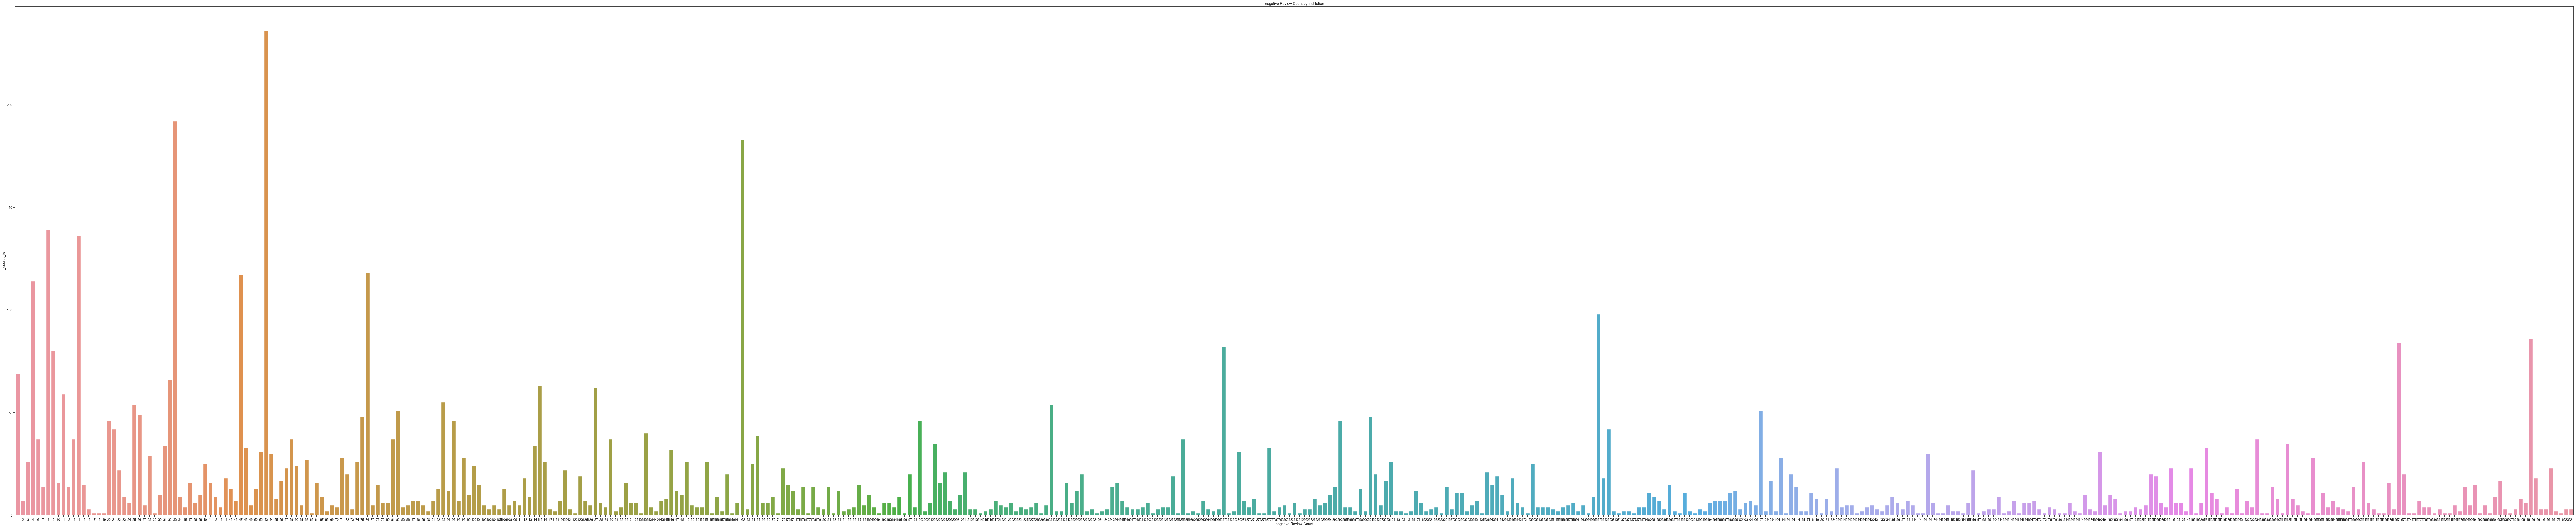

In [176]:
# Filtrar las reseñas con calificación de 5
negative_reviews = coursera_reviews[coursera_reviews['rating'] == 1]

# Contar el número de reseñas positivas por curso
negative_counts = negative_reviews['n_course_id'].value_counts().reset_index()

# Renombrar las columnas
negative_counts.columns = ['n_course_id', 'negative_count']

# Ordenar por el número de reseñas positivas en orden descendente
negative_counts = negative_counts.sort_values('negative_count', ascending=False)

plt.figure(figsize=(150, 30))

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(data=negative_counts, x='n_course_id', y='negative_count')

# Etiquetas de los ejes
plt.xlabel('negative Review Count')
plt.ylabel('n_course_id')

# Título del gráfico
plt.title('negative Review Count by institution')

# Mostrar el gráfico
plt.show()

In [184]:
neg_cons_x_course = negative_counts.head(10)
neg_cons_x_course

,n_course_id,negative_count
0,53,236
1,33,192
2,162,183
3,8,139
4,14,136
5,76,118
6,47,117
7,4,114
8,367,98
9,612,86


In [185]:
neg_cons_x_course.to_csv('negativos_coursera.csv', index=False)
pos_cons_x_course.to_csv('positivos_coursera.csv', index=False)

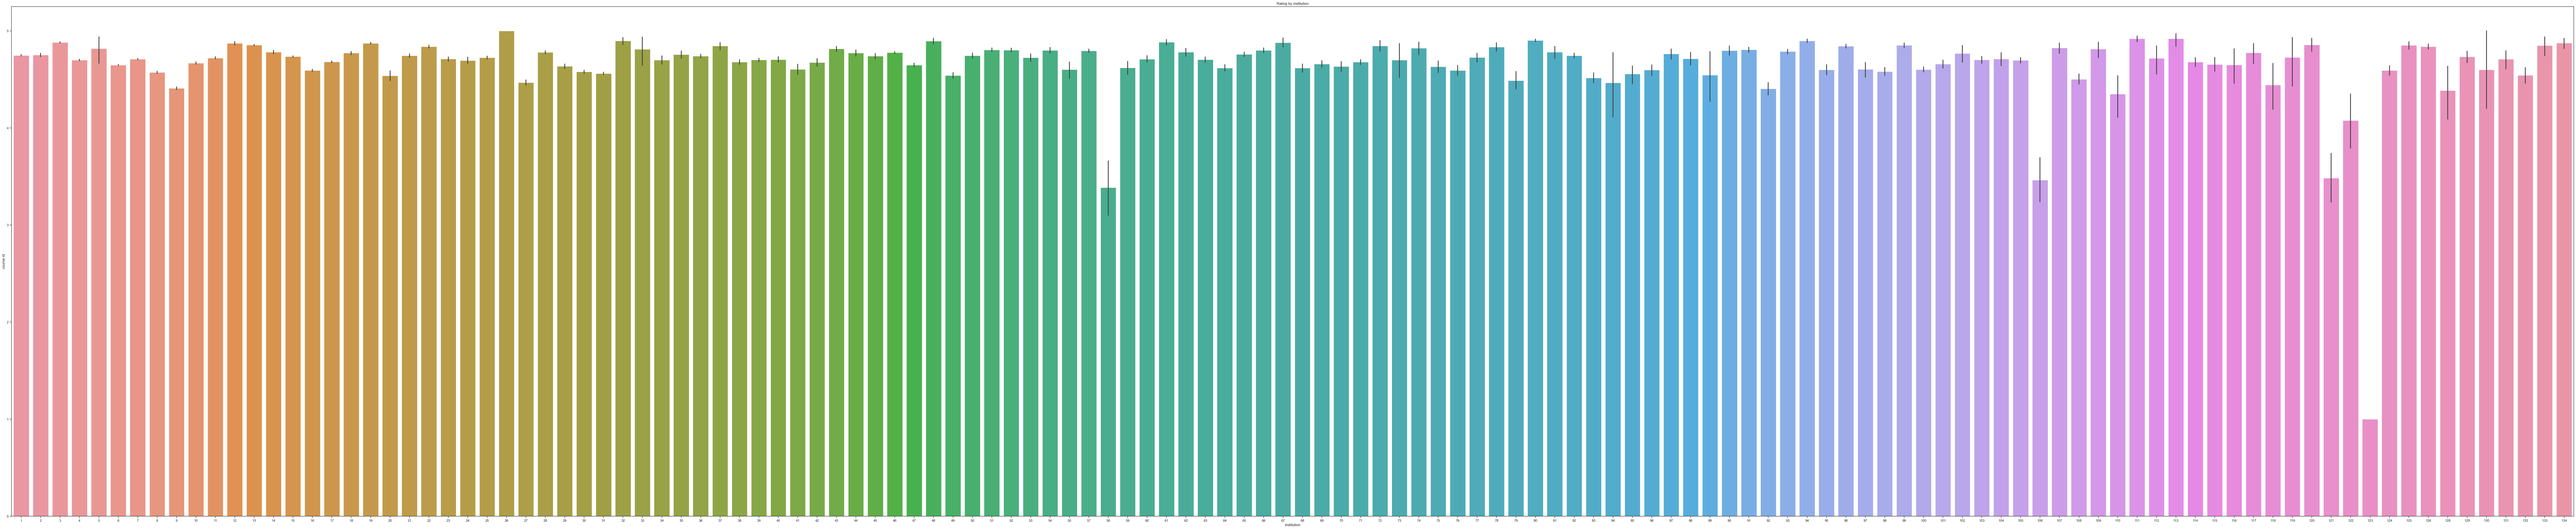

In [178]:
plt.figure(figsize=(150, 30))
sns.barplot(data=coursera_reviews, x='institution_id', y='rating')
# Etiquetas de los ejes
plt.xlabel('institution')
plt.ylabel('course id')

# Título del gráfico
plt.title('Rating by institution')

# Mostrar el gráfico
plt.show()

In [190]:
reseñas_negativas_coursera = coursera_reviews[(coursera_reviews['rating'] == 1) & (coursera_reviews['n_course_id'].isin(neg_cons_x_course['n_course_id']))]

In [191]:
reseñas_negativas_coursera = reseñas_negativas_coursera.drop(['reviewers', 'date_reviews', 'rating', 'course_id', 'sentiment_score', 'institution_id', 'color'], axis=1)

In [192]:
reseñas_negativas_coursera

,reviews,n_course_id
15727,I did not find this course helpful. The assign...,8
15728,I got a 95% and maybe I learned something but ...,8
15729,"Two weeks of all sort of nonsense, including m...",8
15730,We tried to use this class to teach a brown ba...,8
15731,"To be honest, I thought the course stumbled an...",8
...,...,...
1416519,bad,4
1416520,no,4
1416521,ok,4
1453281,Waste of time course,8


In [193]:
reseñas_negativas_coursera.to_csv('reseñas_negativas_coursera.csv', index=False)

In [194]:
reseñas_positivas_coursera = coursera_reviews[(coursera_reviews['rating'] == 5) & (coursera_reviews['n_course_id'].isin(pos_cons_x_course['n_course_id']))]
reseñas_positivas_coursera = reseñas_positivas_coursera.drop(['reviewers', 'date_reviews', 'rating', 'course_id', 'sentiment_score', 'institution_id', 'color'], axis=1)
reseñas_positivas_coursera

,reviews,n_course_id
31018,"Excellent, although, even without having any p...",8
31019,Extremely basic but Dr. Chuck is so interestin...,8
31020,Lecture videos were broken into small parts wh...,8
31021,first time i had done any course online and th...,8
31022,Great introduction to Python and programming a...,8
...,...,...
1454192,This course is so good. I can easily understan...,8
1454195,Excellent and in-depth explanation of each and...,8
1454198,Love it! Even though it isn't my first python ...,8
1454199,Really good introduction to python! This progr...,8


In [195]:
reseñas_positivas_coursera.to_csv('reseñas_positivas_coursera.csv', index=False)

In [197]:
top_10_subs = udemy_courses.nlargest(10, 'num_subscribers')
top_10_subs = top_10_subs[['course_id', 'subject', 'course_title', 'num_subscribers', 'is_paid', 'price', 'level', 'content_duration']]
top_10_subs['earnings'] = top_10_subs['num_subscribers'] * top_10_subs['price']
top_10_subs

,course_id,subject,course_title,num_subscribers,is_paid,price,level,content_duration,earnings
2827,41295,Web Development,Learn HTML5 Programming From Scratch,268923,False,0,All Levels,10.5,0
3032,59014,Web Development,Coding for Entrepreneurs Basic,161029,False,0,Beginner Level,3.5,0
3230,625204,Web Development,The Web Developer Bootcamp,121584,True,200,All Levels,43.0,24316800
2783,173548,Web Development,Build Your First Website in 1 Week with HTML5 ...,120291,False,0,Beginner Level,3.0,0
3232,764164,Web Development,The Complete Web Developer Course 2.0,114512,True,200,All Levels,30.5,22902400
1896,19421,Musical Instruments,Free Beginner Electric Guitar Lessons,101154,False,0,Beginner Level,4.5,0
2589,473160,Web Development,Web Design for Web Developers: Build Beautiful...,98867,False,0,All Levels,3.0,0
2619,94430,Web Development,Learn Javascript & JQuery From Scratch,84897,True,30,All Levels,2.0,2546910
3289,130064,Web Development,Practical PHP: Master the Basics and Code Dyna...,83737,False,0,All Levels,6.5,0
3247,364426,Web Development,JavaScript: Understanding the Weird Parts,79612,True,175,All Levels,11.5,13932100


In [198]:
top_10_subs.to_csv('top_10_udemy.csv', index=False)

In [201]:
numeric_columns = udemy_courses.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

In [202]:
correlation_matrix

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
price,0.142319,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.293450,0.161839,0.228889,0.801647,1.000000


In [207]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [6]:
coursera = coursera_courses['name'].str.lower().unique()
edx = edx_courses['title'].str.lower().unique()
udemy = udemy_courses['course_title'].str.lower().unique()

# Crea un nuevo DataFrame con los valores únicos de los cursos
total_courses = pd.DataFrame({
    'Platform': ['Coursera', 'edX', 'Udemy'],
    'Unique Courses': [len(coursera), len(edx), len(udemy)]
})

In [8]:
total_courses.to_csv('total_cursos.csv', index=False)